In [112]:
import pandas as pd
import numpy as np
import scipy as scipy

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# rc = {'lines.linewidth': 2,
#       'axes.labelsize': 18,
#       'axes.titlesize': 18,
#       'axes.facecolor': 'DFDFE5'}
# sns.set_context('notebook', rc=rc)
sns.set_style("darkgrid")

ALFA = 1

In [2]:
names_cols = ['id',
 'gender',
 'age',
 'age_higher_than_60',
 'rt_pcr_result',
 'crp_admission',
 'inr_admission',
 'pt_admission',
 'fibrinogen_admission',
 'chest_ct_admission',
 'platalet_count_admission',
 'chest_ct_1_week',
 'crp_1_week',
 'platalet_count_1_week']

index_cols = list(range(5)) + list(range(8,17))

icu = pd.read_csv("dataset/Baranovskiietal.2020DatasetofCOVID-19Patients.xlsx - ICU-transferred patients.csv",
                     usecols=index_cols, names=names_cols, index_col=0, header=0, decimal=",")
icu["icu"] = 1

icu.head(3)

,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu
id,,,,,,,,,,,,,,
ICU01,1,37,0,1,133.0,NaN,NaN,NaN,40.0,141,80.0,131.0,376.0,1
ICU02,0,48,0,1,155.0,NaN,NaN,NaN,72.0,238,NaN,135.0,NaN,1
ICU03,0,40,0,1,191.0,1.26,13.7,5.1,50.0,160,92.0,NaN,NaN,1


In [3]:
stable = pd.read_csv("dataset/Baranovskiietal.2020DatasetofCOVID-19Patients.xlsx - Stable patients.csv",
                     names=names_cols, index_col=0, header=0, decimal=",")
stable["icu"] = 0
stable.head()

,id,gender,age,age_higher_than_60,rt_pcr_result,crp_admission,inr_admission,pt_admission,fibrinogen_admission,chest_ct_admission,platalet_count_admission,chest_ct_1_week,crp_1_week,platalet_count_1_week,icu
STP01,1,70,1,1,7.0,112.0,1.10,12.0,5.46,161,40.0,7.0,28.0,407.0,0
STP02,1,46,0,1,10.0,72.0,1.39,15.1,5.00,306,35.0,12.0,28.0,431.0,0
STP03,1,94,1,1,3.0,84.0,1.08,11.8,2.98,199,75.0,20.0,25.0,251.0,0
STP04,1,74,1,1,11.0,69.0,NaN,NaN,NaN,97,40.0,90.0,44.0,316.0,0
STP05,1,53,0,1,8.0,135.0,1.43,15.5,6.87,302,40.0,135.0,NaN,308.0,0


In [4]:
#df = pd.concat([icu, stable], axis=0)
#df.info()
#df.columns

In [104]:
def non_parametric_bootstrap(array, sample_size=20, nsim=1000, central_measure=np.nanmean):
    array = array[~np.isnan(array)]
    statistic = []
    for i in range(nsim):
        statistic.append(central_measure(np.random.choice(array, sample_size, True)))
    return np.array(statistic)

Text(0, 0.5, 'Mean CRP level of samples')

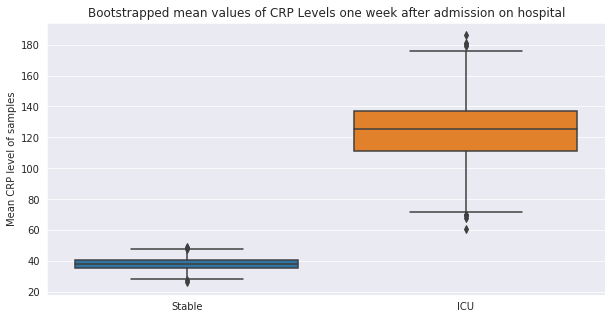

In [105]:
info = "Mean = {0:.3g}; CI95% = [{1:.3g}, {2:.3g}]"
mean_crp_stable = non_parametric_bootstrap(stable.crp_1_week)
mean_crp_icu = non_parametric_bootstrap(icu.crp_1_week)
means = pd.DataFrame({"Stable": mean_crp_stable, "ICU": mean_crp_icu})

plt.figure(figsize=(10, 5))
sns.boxplot(data=means)
# icu_percentis = np.percentile(mean_crp_icu, [2.5, 97.5])
# icu_mean = np.median(mean_crp_icu)
# icu_info = info.format(icu_mean, *icu_percentis)
#
# stable_percentis = np.percentile(mean_crp_stable, [2.5, 97.5])
# stable_mean = np.median(mean_crp_stable)
# stable_info = info.format(stable_mean, *stable_percentis)

plt.title(f"Bootstrapped mean values of CRP Levels one week after admission on hospital")
#plt.xlabel([stable_info, icu_info])
plt.ylabel("Mean CRP level of samples")

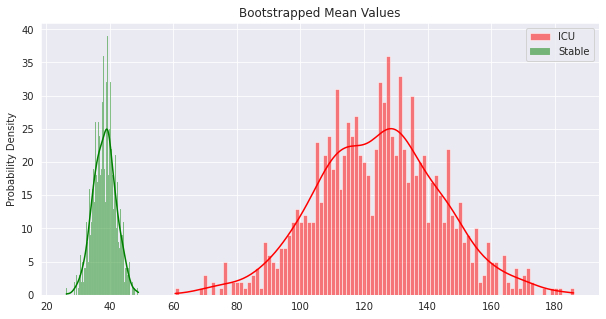

In [106]:
plt.figure(figsize=(10, 5))
sns.histplot(mean_crp_icu, label='ICU', color="r", bins=100, kde=True)
sns.histplot(mean_crp_stable, label='Stable', color="g", bins=100, kde=True)
plt.ylabel('Probability Density')
plt.title('Bootstrapped Mean Values')
plt.legend()

In [113]:
message = "Mean = {0:.3g}; CI = [{1:.3g}, {2:.3g}]"
icu_percentis = np.percentile(mean_crp_icu, [0+ALFA/2, 100-ALFA/2])
icu_mean = np.median(mean_crp_icu)
message.format(icu_mean, *icu_percentis)

'Mean = 125; CI = [72, 173]'

In [114]:
stable_percentis = np.percentile(mean_crp_stable, [0+ALFA/2, 100-ALFA/2])
stable_mean = mean_crp_stable.mean()
message.format(stable_mean, *stable_percentis)

'Mean = 38.3; CI = [29.3, 47.4]'

# Hypothesis Test:
 -  Null hypothesis: CRP mean level of stable patients == CRP mean level of ICU patients

 - Alternative hypothesis: CRP mean level of stable patients != CRP mean level of ICU patients

Alpha: 1%

In [126]:
mean_crp_stable = non_parametric_bootstrap(stable.crp_1_week, nsim=10000)
mean_crp_icu = non_parametric_bootstrap(icu.crp_1_week, nsim=10000)

In [128]:
stat, pvalue = scipy.stats.mannwhitneyu(mean_crp_stable, mean_crp_icu)

if pvalue < ALFA / 100:
    print('We reject the null hypothesis with a p-value of {0:.2g}'.format(pvalue))
else:
    print('We fail to reject the null hypothesis with a p-value of {0:.2g}'.format(pvalue))

We reject the null hypothesis with a p-value of 0


The p-value for these samples is 0
We can reject the null hypothesis that the means are equal between both samples


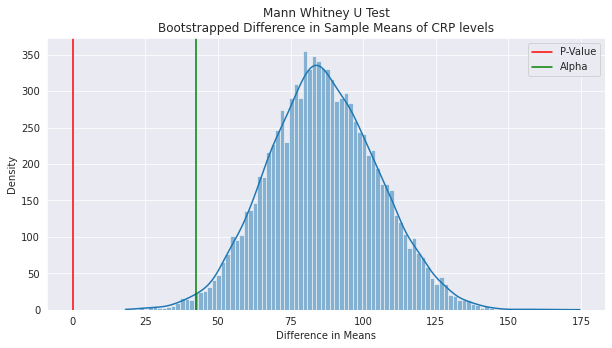

In [130]:
diff = mean_crp_icu - mean_crp_stable
pvalue = (diff < 0).mean()
plt.figure(figsize=(10, 5))
sns.histplot(diff, bins=100, kde=True)
plt.axvline(stat, color='red',label='P-Value')
plt.axvline(np.percentile(diff, ALFA), color='green',label='Alpha')
plt.title("Mann Whitney U Test\nBootstrapped Difference in Sample Means of CRP levels")
plt.xlabel("Difference in Means")
plt.ylabel("Density")
plt.legend()

print('The p-value for these samples is {:.3g}'.format(pvalue))
if pvalue < ALFA/100:
    print('We can reject the null hypothesis that the means are equal between both samples')
else:
    print('We cannot reject the null hypothesis that the means are equal between both samples')

# References
 - [Bootstrap non parametric test](https://vulstats.ucsd.edu/pdf/Howell.ch-18.rank-statistics.pdf)


